In [23]:
#author ksdhillon
import numpy as np
from matplotlib import pyplot as plt
import cv2


In [24]:

def naive_DFT(x):
    N = np.size(x)
    X = np.zeros((N,),dtype=np.complex128)
    for m in range(0,N):    
        for n in range(0,N): 
            X[m] += x[n]*np.exp(-np.pi*2j*m*n/N)
    return X
def naive_IDFT(x):
    N = np.size(x)
    X = np.zeros((N,),dtype=np.complex128)
    for m in range(0,N):
        for n in range(0,N): 
            X[m] += x[n]*np.exp(np.pi*2j*m*n/N)
    return X/N

In [26]:
#import image
imgInput = cv2.imread("echo.png")

sampleArr = imgInput[0,:,0] #Take a row (or column) of a interesting image.
sampleArr = sampleArr.astype(dtype=np.csingle)
kdFourier = naive_DFT(sampleArr)
npFourier = np.fft.fft(sampleArr)

# now compare DFT with numpy fft/ You can also use plots
print('Is naive_DFT similar to fft?',np.allclose(kdFourier - npFourier,1e-12))

kdFourier[len(sampleArr)//2] /= 2
npFourier[len(sampleArr)//2] /= 2

kd_naive_IDFT= naive_IDFT(kdFourier)
np_naive_IDFT = np.fft.ifft(npFourier)

print('Is kd_naive_IDFT similar to np_naive_IDFT?',np.allclose(kd_naive_IDFT - np_naive_IDFT,1e-12))

"""for plots
xlin = np.linspace(0,1,sampleArr.size)
xAxis = np.fft.fftfreq(len(sampleArr), d=xlin[1]-xlin[0])
plt.suptitle("Fourier Transforms")
plt.plot(xAxis, abs(kdFourier)**2,label="kdFourier")
plt.plot(xAxis, abs(npFourier)**2,label="Numpy Fourier")
plt.xlabel("Frequency in Hz")
plt.legend(loc="upper left")
plt.show()
"""


Is naive_DFT similar to fft? True
Is kd_naive_IDFT similar to np_naive_IDFT? True


'for plots\nxlin = np.linspace(0,1,sampleArr.size)\nxAxis = np.fft.fftfreq(len(sampleArr), d=xlin[1]-xlin[0])\nplt.suptitle("Fourier Transforms")\nplt.plot(xAxis, abs(kdFourier)**2,label="kdFourier")\nplt.plot(xAxis, abs(npFourier)**2,label="Numpy Fourier")\nplt.xlabel("Frequency in Hz")\nplt.legend(loc="upper left")\nplt.show()\n'

#Data fitting (scattered data interpolation)
"""
. Generate a “random” 1-D or 2-D function by adding together a small number of sinusoids or Gaussians of random amplitudes and frequencies or scales.
2. Sample this function at a few dozen random locations.
3. Fit a function to these data points using least squares polynomial fit technique .
4. Measure the fitting error between the estimated and original functions at some set of locations, e.g., on a regular grid or at different random points.

The easiest (at least to me) way to compute the least squares fit is to setup a matrix like this one, using (xi, yi) pairs from the sampling in 2. above:
"""

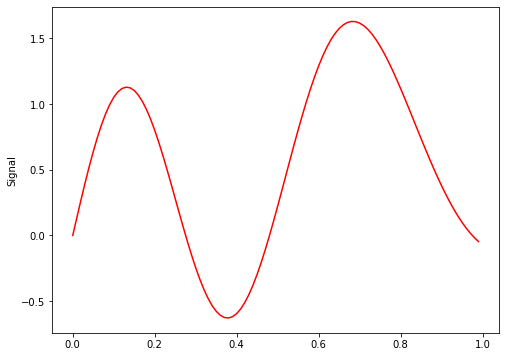

In [77]:
from random import random
# Sampling Rate
sr = 100
# Sampling Interval
ts = 1.0/sr
x = np.arange(0,1,ts)
# Adding sine Components
y = np.sin(x)
y += np.sin(2*np.pi*2*y)
#Plot
plt.figure(figsize = (8, 6))
plt.plot(x, y, 'r')
plt.ylabel('Signal')
plt.show()

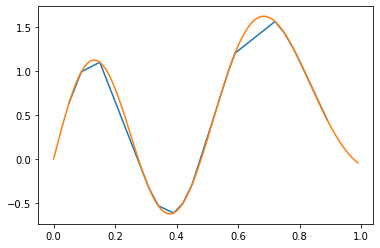

In [105]:
#solve linear equations
sample_size=20 #number of sample locations
rand_sampl=np.sort(np.random.randint(0,100, size=sample_size)) #random sample index locations

deg=20 #degree of polynomial to fit
x_sampl=[x[rand_sampl[j]] for j in range (sample_size)] #x values at random location index

X=np.zeros([sample_size,deg]) #initial X weight matrix
for k in range (deg):
  X[:,k]=np.power(np.array(x_sampl),k) #X weight matrix

Y=np.array([y[rand_sampl[j]] for j in range (sample_size)])

A, residuals, rank, s=np.linalg.lstsq(X,Y, rcond=None)

ycalc=X@A #calculated function

#plt.plot(x_sampl,Y,'or')
plt.plot(x_sampl,ycalc)
plt.plot(x,y)
plt.show()


In [115]:
#4. Measure the fitting error between the estimated and original functions at some set of locations, e.g., on a regular grid or at different random points.
random_points=np.random.randint(low=0, high=len(x_sampl), size=(10,))
Yfit,Yfit_sample=[],[]
for point in random_points:
  Yfit.append(ycalc[point])
  Yfit_sample.append(Y[point])
Fit_error=np.sum(np.abs(np.array(Yfit)-np.array(Yfit_sample)))/10
print("Fitting error:",Fit_error)

Fitting error: 6.707500777025643e-10


# Characterizing Bilateral Filtering

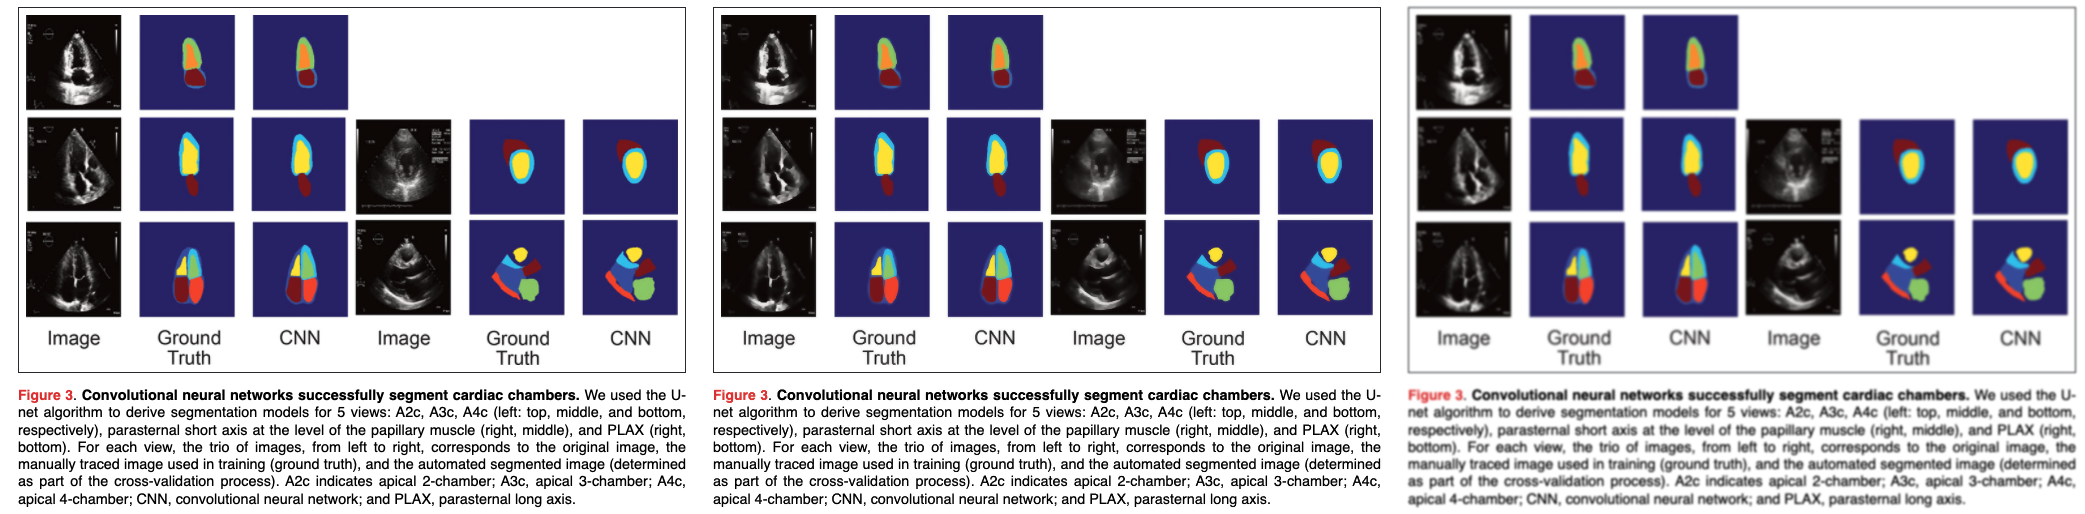

In [120]:

from google.colab.patches import cv2_imshow
bl_img=cv2.bilateralFilter(imgInput,5, 75,75)
gau_img = cv2.GaussianBlur(imgInput,(5,5),0)
filt_ims=cv2.hconcat((imgInput,bl_img,gau_img))
cv2_imshow(filt_ims)
#Take a few windows (you decide exactly what size, feel free to experiment!) of the each image near some interesting edge structure in the the image that is well preserved by the bilateral filter.
# Compare the spectrums of the original and two filtered versions of the image at these windows.

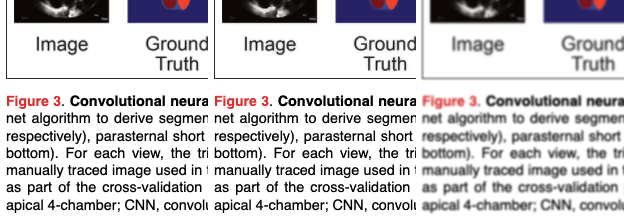

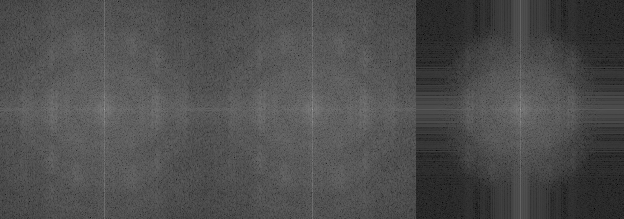

In [128]:
# Windows
xmin=12
xmax=220
ymin=-220
ymax=-1
img_win=imgInput[ymin:ymax,xmin:xmax]
bl_win=bl_img[ymin:ymax,xmin:xmax]
gau_win=gau_img[ymin:ymax,xmin:xmax]
filt_win=cv2.hconcat((img_win,bl_win,gau_win))

cv2_imshow(filt_win)

img_wing=cv2.cvtColor(img_win, cv2.COLOR_BGR2GRAY)
gau_wing = cv2.cvtColor(gau_win, cv2.COLOR_BGR2GRAY)
bl_wing = cv2.cvtColor(bl_win, cv2.COLOR_BGR2GRAY)

fft_wing=10*np.log(np.abs(np.fft.fftshift(np.fft.fft2(img_wing)))) 
fft_blwing=10*np.log(np.abs(np.fft.fftshift(np.fft.fft2(bl_wing))))
fft_gawing=10*np.log(np.abs(np.fft.fftshift(np.fft.fft2(gau_wing))))

fft_wingg=cv2.hconcat((fft_wing,fft_blwing,fft_gawing))

cv2_imshow(fft_wingg)



